In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib widget

In [2]:
x1 = np.random.uniform(-1, 1, size = 100)
y1 = 0.5*x1 + np.random.normal(0, 0.05, size=100)
x2 = np.random.uniform(-1, 1, size = 60)
y2 = - 0.5*x2 + np.random.normal(0, 0.05, size=60)
z1 = np.random.normal(0, 0.01, size=100)
z2 = np.random.normal(0, 0.01, size=60)

d1 = np.c_[x1, y1, z1]
d2 = np.c_[x2, y2, z2]
data = np.r_[d1, d2]

In [3]:
data.shape

(160, 3)

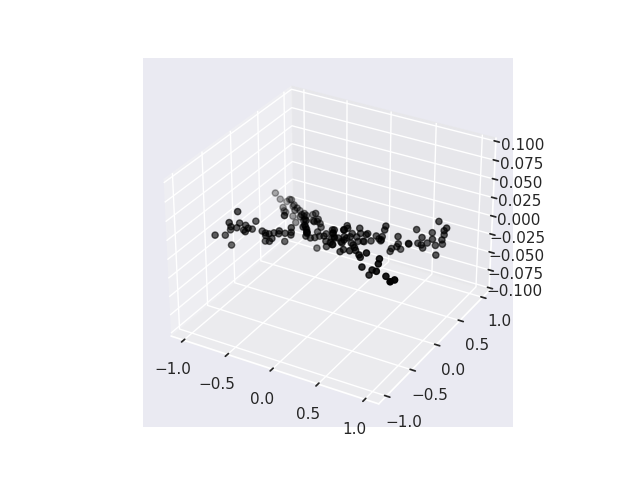

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data[:,0], data[:,1], data[:, 2], color='black')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_zlim(-0.1, 0.1)
plt.show()

In [5]:
pca_ = PCA(2)
data_transform = pca_.fit_transform(data)
inv = pca_.inverse_transform(data_transform)

pca_.components_

array([[ 0.97639754,  0.21597628, -0.00144884],
       [ 0.21597921, -0.97633844,  0.01078098]])

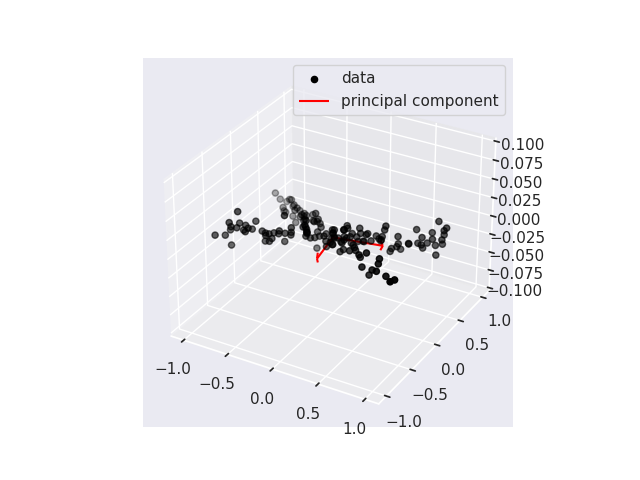

In [6]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], color='black', label='data')

vec1 = np.r_[np.zeros(3), pca_.components_[0]]
vec2 = np.r_[np.zeros(3), pca_.components_[1]]
vec = np.array([vec1, vec2])
X, Y, Z, U, V, W = zip(*vec)

ax.quiver(X, Y, Z, U, V, W, color='red', label='principal component', length=0.5, normalize=True, arrow_length_ratio=0.05)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_zlim(-.1, .1)

ax.legend()
plt.show()

In [15]:
p1 = pca_.components_[0]
p1 = data@p1

p2 = pca_.components_[1]
p2 = data@p2


np.corrcoef(p1, p2)


(array([[1.00000000e+00, 1.02782886e-16],
        [1.02782886e-16, 1.00000000e+00]]),
 array([[1.        , 0.33314744],
        [0.33314744, 1.        ]]))